# Running or Importing .py Files with Google Colab

Run these codes first in order to install the necessary libraries and perform authorization.

mount your Google Drive:

# Naive Bayes for Sentiment Analysis

---

*   **Text classification** aims to assign documents (emails, tweets, posts, news, etc) to one or many categories.
*   *Sentiment analysis*, one example of its applications, is to detemine the writer's point of view about a particular topic, product, service, etc

---

In [1]:
import utils
import importlib
# importlib.reload(utils)
from utils import *
import nltk
nltk.download('punkt')


%matplotlib inline

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import re, string, collections, bcolz, pickle, os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.metrics import confusion_matrix

from nltk.tokenize import word_tokenize
from nltk.tokenize.regexp import RegexpTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryu07\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data Preprocessing

1.   Data scraping
2.   Data cleaning
3.   Exploratory data analysis

## Sentiment analysis


*   Objective: To train a **sentiment analysis classifier** given the games reviews in the dataset. The model must classify text reviews in positive or negative



In [2]:
df = pd.read_csv('reviews.csv', lineterminator='\n')
# df.shape
print('There\'s %d games reviews.' % df.shape[0])


There's 127699 games reviews.


  Let's keep just text and score columns

In [3]:
df = df[['text', 'score']]
df

,text,score
0,"it makes a terrible first impression, but ult...",74.0
1,brings some fresh and inventive ideas to the ...,65.0
2,a fun main mode of play that can get quite add...,60.0
3,"simply put, feels like half of a game.",60.0
4,"combined with the price and lack of cross-buy,...",60.0
5,"feels like an unfinished product, and it’s a ...",60.0
6,had a lot of love poured into its development...,90.0
7,this game has sparked an interest in anime tha...,85.0
8,"last recode is a very well done compilation, w...",80.0
9,is an incredible package of remastered games....,80.0




---


The data have 127699 reviews but we will keep just the most polarized ones. The filter is the next:

Positive: score > 85

Negative: score < 50


---



In [4]:
print('Review with score greater than 85: %d' % len(df.loc[df["score"] > 85]))
print('Review with score less than 50: %d' % len(df.loc[df["score"] < 50]))

Review with score greater than 85: 43518
Review with score less than 50: 20428


In [5]:
pos = df.loc[df['score'] > 85, 'text'].copy().reset_index(drop=True)
neg = df.loc[df['score'] < 50, 'text'].copy().reset_index(drop=True)

Let's print some positive reviews examples

In [6]:
for i in range(4):
    print(''.join(pos[np.random.randint(0, len(pos))]))
    print('\n')

amazing game will become a classic. you really connect with the character which most games are lacking no wadays. the graphics are amazing. so is the voice acting.


i loved the first game cause of its story and well design, the way players could make their own custom routes around levels. the sequel refines all of this and makes it better also with more content such as 2 playable characters flesh and steel and overall story.


nevertheless,  is a bringing together of what is probably the best set of games of the last generation.


it's easily one of the best games i have ever played. the story was good, the graphics were amazing, it was violent and the acting was good. the fact that the choices you make really do matter makes this game even better. i highly recommend it.




Let's print some negative reviews examples

In [7]:
for i in range(4):
    print(''.join(neg[np.random.randint(0, len(neg))]))
    print('\n')

the game also fails as a high-profile ps4 launch title in terms of what it’s putting onscreen. the particle effects serve their purpose, but everything from the vapid story sequences to the hackneyed goblin foes feels blandly feeble. a chapter setting entitled the barren wastes? yes, you think, no need to ram it home.


game sucks    a lot


 the random loot system in this game is pure crap. after playing so many levels over and over again, i get the most disappointing loot(blue cape's). also i collected 5 legendary engrams in total but the outcome were four blue and one green.


this is the fourth time the same game is being released with different skins and textures. every year theres another far cry, which is the same story, the same characters, the same engine, the same same.




We must add the labels: 1 for positive reviews, 0 for negative reviews

In [8]:
pos = pd.concat([pd.DataFrame(pos), pd.DataFrame(np.ones(pos.shape), columns=['class'])], 1)
neg = pd.concat([pd.DataFrame(neg), pd.DataFrame(np.zeros(neg.shape), columns=['class'])], 1)

Mean, standard deviation and max length of negative reviews

In [9]:
lens = neg['text'].str.len()
lens.mean(), lens.std(), lens.max()

(681.7165654983356, 823.7599066187877, 14736)

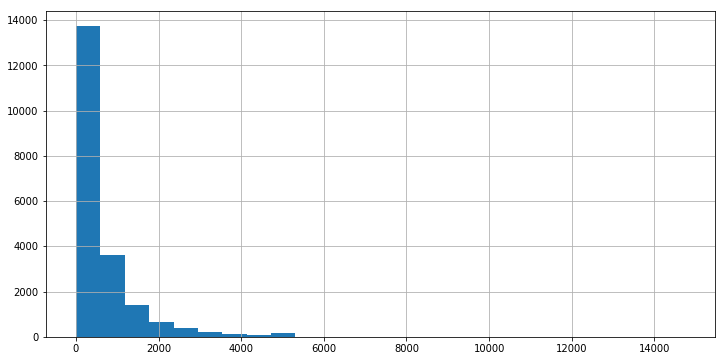

In [10]:
lens.hist(figsize=(12,6), bins=25)

Reviews with more than 5000 characters are dropped

In [11]:
long_reviews = neg.loc[neg['text'].str.len() > 5000].index
neg.drop(long_reviews, inplace=True)

Mean, standard deviation and max length of positive reviews

In [12]:
lens = pos['text'].str.len()
lens.mean(), lens.std(), lens.max()

(586.1869801001884, 738.040146996147, 25554)

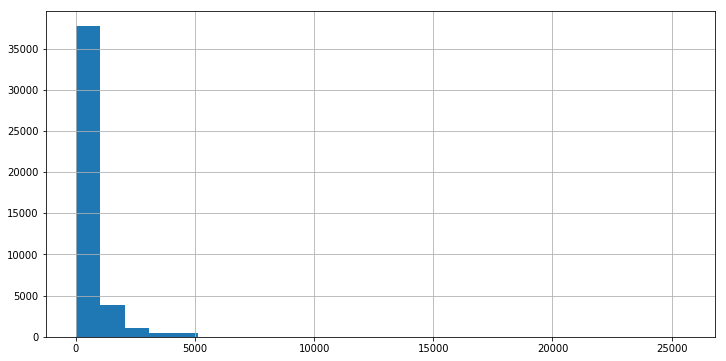

In [13]:
lens.hist(figsize=(12,6), bins=25)

In [14]:
long_reviews = pos.loc[pos['text'].str.len() > 5000].index
pos.drop(long_reviews, inplace=True)

In [15]:
len(neg)

20419

Is desirable to have a balanced dataset (similar quantity of positive and negative instances).

So we will pick a random subset of the positive instances.

In [16]:
np.random.seed(42)
rand = np.random.permutation(pos.shape[0])
pos = pos.iloc[rand[:neg.shape[0]]].reset_index(drop=True)

In [17]:
pos.shape, neg.shape

((20419, 2), (20419, 2))

We concatenate positive and negative reviews

In [18]:
df = pd.concat([pos, neg]).sample(frac=1).reset_index(drop=True)
df

,text,class
0,guys i got this game 2 days ago and i found it...,1.0
1,a resounding meh. less than even. this game ha...,0.0
2,"well, its out. i am a massive fan of the tony ...",0.0
3,a very good game that could have been a lot be...,1.0
4,"simply horrible. dlc full of glitches, lack of...",0.0
5,for the $60 price tag i feel i've been ripped ...,0.0
6,november has been another bad month for ps+ us...,0.0
7,"great art style, tongue-in-cheek dialogues, fa...",1.0
8,i'm giving this a 10 to combatant the totally ...,1.0
9,nex machina is shoot-em-up kings housemarque's...,1.0


In [19]:
df.shape

(40838, 2)

Split data into train and test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['text'].values, df['class'].values, test_size=0.2, random_state=42)

In [21]:
len(X_train), len(X_test), len(y_train), len(y_test)

(32670, 8168, 32670, 8168)

# Preparing the data
Computers do not understand about plain text, so we need to transform our documents into numeric representations.



---


## Tokenization


*   Splitting text into relevant units(characters, words, phrases or others), which are called tokens.
*   For instance:
"a very good game that could have been a lot better" -> ['a', 'very', 'good', 'game', 'that', 'could', 'have', 'been', 'a', 'lot', 'better']

*   There are several tonekizers out there that we can use: spaCy, keras, NLTK, fast.ai, just to name a few.





---

## Bag-of-Words (BoW)



*   Creating a numerical feature vector for each document
*   BoW counts the number of times that tokens appear in every document of the collection.
*   It returns a matrix with the next characteristics:


      1.   Number of columns = number of unique tokens in the whole collection of documents (vocabulary)
      2.   Number of rows = number of documents in the whole collection of documents








---



In [22]:
# vect = CountVectorizer(tokenizer=word_tokenize)
vect = CountVectorizer(tokenizer=RegexpTokenizer("[\w']+").tokenize)

# vect = CountVectorizer(tokenizer=WordPunctTokenizer().tokenize)


tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [23]:
tokenizer=RegexpTokenizer("[\w']+")
vect = CountVectorizer(tokenizer=RegexpTokenizer("[\w']+").tokenize)
# vect = CountVectorizer(analyzer='word', tokenizer=RegexpTokenizer("[\w']+").tokenize,
#                        decode_error='strict', input='content', encoding='utf-8')
tf_train = vect.fit_transform(X_train)

In [24]:
def base_filter():
    f = string.punctuation
    f = f.replace("'", '')
    f += '\t\n'
    return f

In [25]:
re_tok = re.compile( base_filter )
def tokenize(s): return re_tok.sub(r' \1 ', s).split()
vect = CountVectorizer(tokenizer=tokenize)

TypeError: first argument must be string or compiled pattern

In [26]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern="[\\w']+", gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>,
        vocabulary=None)

In [27]:
tf_train

<32670x47547 sparse matrix of type '<class 'numpy.int64'>'
	with 2410815 stored elements in Compressed Sparse Row format>

In [28]:
vocab = vect.get_feature_names()
vocab[403:408]

["'fulton'", "'fun'", "'functions'", "'fury", "'galaxy"]

In [29]:
tf_test

<8168x47547 sparse matrix of type '<class 'numpy.int64'>'
	with 598639 stored elements in Compressed Sparse Row format>

32469 training documents, 8163 test documents and 60865 tokens in the vocabulary.

Just a small fraction of tokens are present in each document, so most part of cells are filled with zeros. For efficient storage, sparse matrices are used.

In [30]:
X_train[0]

"on paper, then,  is an exciting proposition that bundles the promises of aspirational game design with the raw power and fun associated with motorbikes. unfortunately, those promises are broken and the resulting game falls flat. unless you're so enamoured with two-wheeled machines that you simply can't help but pick yourself up a copy, you should wait for a new contender to try its hand at delivering a biking game of this scope."

In [31]:
w0 = set([o for o in X_train[0].split(' ')])
w0

{'',
 'a',
 'an',
 'and',
 'are',
 'aspirational',
 'associated',
 'at',
 'biking',
 'broken',
 'bundles',
 'but',
 "can't",
 'contender',
 'copy,',
 'delivering',
 'design',
 'enamoured',
 'exciting',
 'falls',
 'flat.',
 'for',
 'fun',
 'game',
 'hand',
 'help',
 'is',
 'its',
 'machines',
 'motorbikes.',
 'new',
 'of',
 'on',
 'paper,',
 'pick',
 'power',
 'promises',
 'proposition',
 'raw',
 'resulting',
 'scope.',
 'should',
 'simply',
 'so',
 'that',
 'the',
 'then,',
 'this',
 'those',
 'to',
 'try',
 'two-wheeled',
 'unfortunately,',
 'unless',
 'up',
 'wait',
 'with',
 'you',
 "you're",
 'yourself'}

In [32]:
vect.vocabulary_['unless']

44390

In [33]:
tf_train[0, 44486]

0

# Building a classifier

Naive Bayes is a probabilistic learning method based on applying Bayes' theorem. There are some variations of the algorithm but here we will work with Multinomial.

## Multinomial Naive Bayes
Let each row of out term-document training matrix be the feature count vector for training case *i*.

tf_train[i]  # feature count vector for training case *i*

y_train[i]  # label for training case *i*


---



The count vectors are defined as:

*p*=sum of all feature count vectors with label 1

*q*=sum of all feature count vectors with label 0

In [34]:
p = (tf_train[y_train==1].sum(0) + 1).astype('float')
q = (tf_train[y_train==0].sum(0) + 1).astype('float')

Notice that we add 1 to both count vectors to ensure that every token appear at least one time in each class.


---

The log-count ratie *r* is:


In [35]:
r = np.log((p/p.sum()) / (q/q.sum()))  # log-likelihood
b = np.log(p.sum()/(q.sum()+p.sum()))  # log-prior



In [46]:
print(p.shape)
print(q.shape)

(1, 47547)
(1, 47547)


In [37]:
pre_preds = tf_test * r.T + b
preds = pre_preds.T > 0
acc = (preds==y_test).mean()

acc

0.9035259549461312

In [38]:
model = LogisticRegression(C=0.2, dual=True)
model.fit(tf_train, y_train)
preds = model.predict(tf_test)
acc = (preds==y_test).mean()
acc

0.9255631733594515

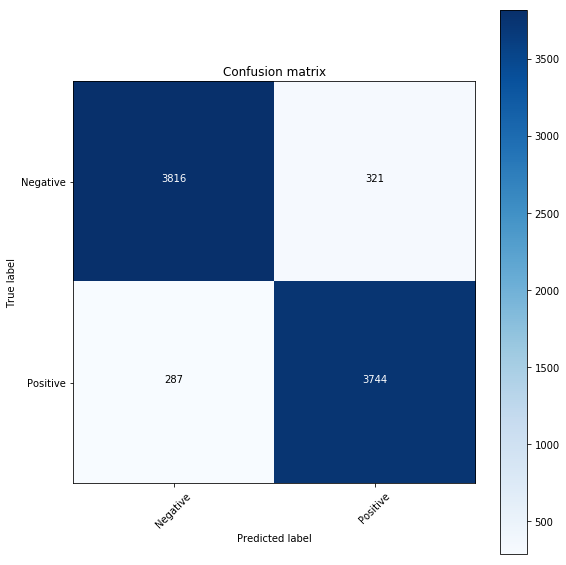

In [39]:
plot_confusion_matrix(confusion_matrix(y_test, preds.T), classes=['Negative', 'Positive'], title='Confusion matrix')

In [40]:
coef_df = pd.DataFrame({'vocab': vocab, 'coef':model.coef_.reshape(-1)})
pos_top10 = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)[:10]
neg_top10 = coef_df.sort_values('coef').reset_index(drop=True)[:10]

In [41]:
model.coef_.shape

(1, 47547)

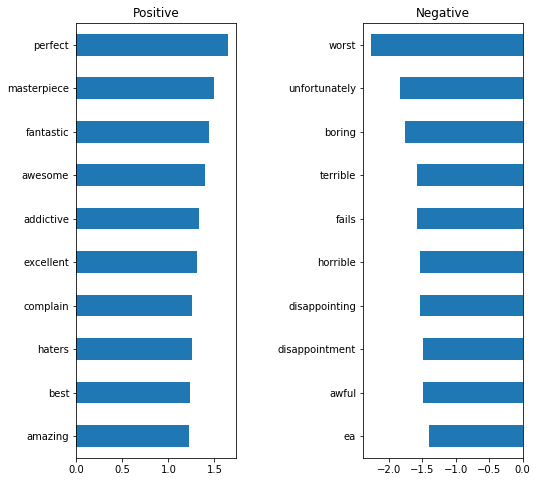

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(8, 8))
fig.subplots_adjust(wspace=0.8)
pos_top10.sort_values('coef').plot.barh(legend=False, ax=axs[0])
axs[0].set_yticklabels(pos_top10['vocab'].values.tolist()[::-1])
axs[0].set_title('Positive');
neg_top10.sort_values('coef', ascending=False).plot.barh(legend=False, ax=axs[1])
axs[1].set_yticklabels(neg_top10['vocab'].values.tolist()[::-1])
axs[1].set_title('Negative');